# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pamelamoreno/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='Bitcoin', language='en', sort_by='relevancy')

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='Ethereum', language='en', sort_by='relevancy')

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957
2,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831
3,2021-06-09,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940
4,2021-06-11,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000
1,2021-06-20,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939
2,2021-05-31,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000
3,2021-06-10,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934
4,2021-06-03,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.157765,0.070700,0.028100,0.901150
std,0.373399,0.071767,0.035811,0.068869
min,-0.381800,0.000000,0.000000,0.718000
25%,-0.050575,0.000000,0.000000,0.844750
50%,0.128000,0.060500,0.000000,0.923000
75%,0.369700,0.105500,0.064750,0.943750
max,0.840200,0.282000,0.083000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.000125,0.027750,0.023650,0.948600
std,0.270497,0.035927,0.041336,0.051795
min,-0.458800,0.000000,0.000000,0.782000
25%,-0.273200,0.000000,0.000000,0.929250
50%,0.000000,0.000000,0.000000,0.939500
75%,0.184000,0.065500,0.060250,1.000000
max,0.493900,0.091000,0.151000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with 6.41%

Q: Which coin had the highest compound score?

A: Bitcoin with 84%

Q. Which coin had the highest positive score?

A: Bitcoin with 28%

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import reuters,stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from nltk.util import ngrams
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw_addon = {'an', 'at', 'to', 'when', 'for'}

# Expand the default stopwords list if necessary
print(sw_addon)

{'when', 'an', 'to', 'at', 'for'}


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_df['Tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."
2,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"[clean, energy, seemselon, musk, tesla, caused..."
3,2021-06-09,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940,"[image, captionthe, move, mean, bitcoin, accep..."
4,2021-06-11,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893,"[several, crypto, fan, descended, miami, flori..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_df['Tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,2021-06-20,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
2,2021-05-31,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000,"[representation, virtual, currency, ethereum, ..."
3,2021-06-10,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
4,2021-06-03,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000,"[new, mining, feature, called, norton, crypto,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
all_btc_words = []
for token in bitcoin_df['Tokens']:
    for text in token:
        all_btc_words.append(text)
btc_bigram_counter = Counter(ngrams(all_btc_words, n=2))
print(dict(btc_bigram_counter.most_common(10)))

{('bitcoin', 'legal'): 6, ('legal', 'tender'): 5, ('el', 'salvador'): 5, ('june', 'reuters'): 4, ('reuters', 'el'): 4, ('previous', 'closebitcoin'): 4, ('closebitcoin', 'world'): 4, ('world', 'biggest'): 4, ('biggest', 'bestknown'): 4, ('bestknown', 'cryptocurrency'): 4}


In [18]:
# Generate the Ethereum N-grams where N=2
all_eth_words = []
for token in ethereum_df['Tokens']:
    for text in token:
        all_eth_words.append(text)
eth_bigram_counter = Counter(ngrams(all_eth_words, n=2))
print(dict(eth_bigram_counter.most_common(10)))

{('previous', 'closebitcoin'): 4, ('closebitcoin', 'world'): 4, ('world', 'biggest'): 4, ('biggest', 'bestknown'): 4, ('bestknown', 'cryptocurrency'): 4, ('digital', 'yuan'): 3, ('char', 'bitcoin'): 3, ('adding', 'previous'): 3, ('tldr', 'cryptocurrency'): 2, ('cryptocurrency', 'ethereum'): 2}


In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
token_count(all_btc_words)

[('char', 20),
 ('bitcoin', 17),
 ('reuters', 9),
 ('cryptocurrency', 8),
 ('salvador', 8),
 ('el', 6),
 ('legal', 6),
 ('world', 6),
 ('us', 6),
 ('tender', 5)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
token_count(all_eth_words)

[('char', 19),
 ('cryptocurrency', 8),
 ('world', 7),
 ('digital', 6),
 ('ethereum', 5),
 ('blockchain', 4),
 ('nft', 4),
 ('bitcoin', 4),
 ('previous', 4),
 ('closebitcoin', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
# Generate word cloud for both coins
def process_text(corpus): 
    big_string = ' '.join(corpus)
    return big_string

In [24]:
btc_words = process_text(all_btc_words)

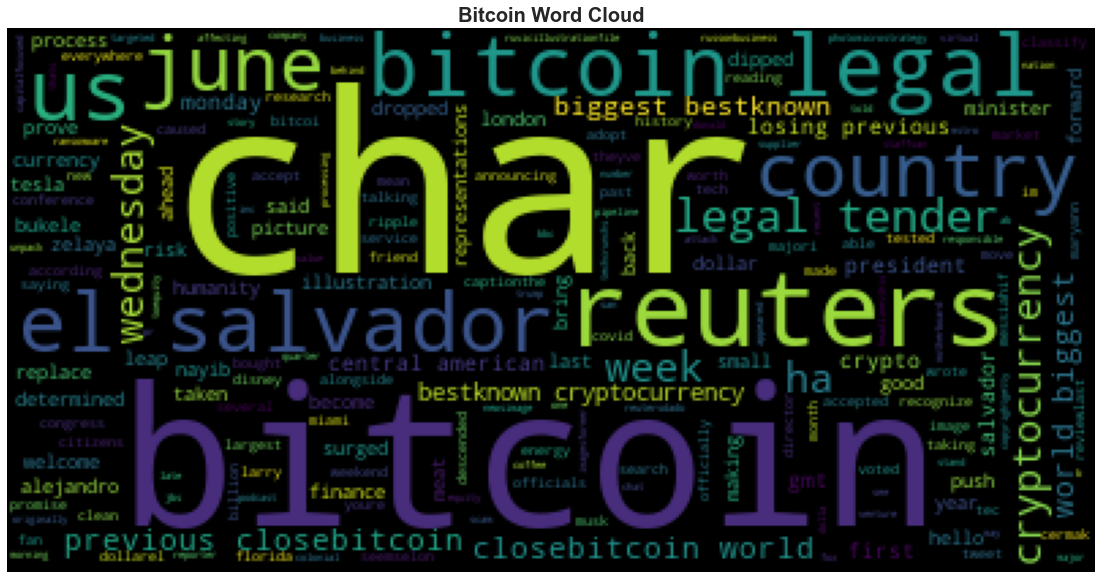

In [25]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_words)
plt.imshow(btc_wc)
plt.title('Bitcoin Word Cloud', fontsize=20, fontweight='bold')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
plt.axis('off')
plt.show()

In [26]:
eth_words = process_text(all_eth_words)

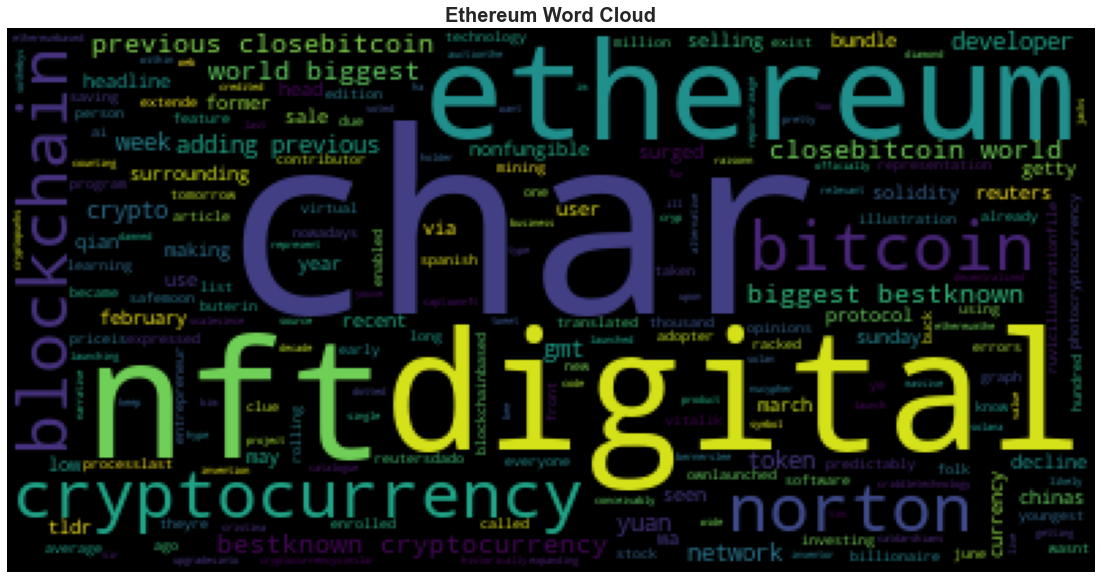

In [27]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_words)
plt.imshow(eth_wc)
plt.title('Ethereum Word Cloud', fontsize=20, fontweight='bold')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
plt.axis('off')
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
bitcoin_text = []

for text in bitcoin_df['text']:
    text = text
    bitcoin_text.append(text)
    
btc_concatenated = ' '.join(bitcoin_text)

In [32]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(btc_concatenated)

# Add a title to the document
bitcoin_doc.user_data['title'] = 'Bitcoin NER'

In [33]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [34]:
# List all Entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

El Salvador's GPE
Nayib Bukele PERSON
Bitcoin GPE
Central American NORP
congress ORG
El Salvador GPE
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Tesla ORDINAL
the past few months DATE
first ORDINAL
Tesla ORDINAL
$1.5 billion MONEY
US GPE
El Salvador GPE
first ORDINAL
Bitcoin GPE
Miami GPE
Florida GPE
last weekend DATE
covid-19 DATE
Larry Cermak PERSON
Review ORG
Last week DATE
Disney ORG
This week DATE
Mary-Ann RussonBusiness PERSON
BBC News ORG
US GPE
Donald Trump PERSON
Fox Business ORG
Bitcoin GPE
US GPE
SAN SALVADOR GPE
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Bitcoin GPE
May 20, 2021 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GPE
Alejandro Zelaya PERSON
Wednesday DATE
the Central American NORP
Colonial Pipeline LOC
JBS ORG
up to one quarter DATE
US GPE
Late last week DATE


---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
ethereum_text = []

for text in ethereum_df['text']:
    text = text
    ethereum_text.append(text)
    
eth_concatenated = ' '.join(ethereum_text)

In [36]:
# Run the NER processor on all of the text
ethereum_doc = nlp(eth_concatenated)

# Add a title to the document
ethereum_doc.user_data['title'] = 'Ethereum NER'

In [37]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [38]:
# List all Entities
for ent in ethereum_doc.ents:
    print (ent, ent.label_)

21.25 MONEY
June 17 DATE
97% PERCENT
NFT ORG
hundreds of thousands CARDINAL
February 19, 2021 DATE
REUTERS/ ORG
Spanish NORP
AI GPE
Last May DATE
VitaliK Buterin PERSON
Norton Crypto' PERSON
tomorrow DATE
Norton ORG
360 CARDINAL
Norton ORG
Norton Crypto PERSON
March 2021 DATE
more than one million CARDINAL
SafeMoon WORK_OF_ART
CryptoPunks ORG
decades DATE
Ill PERSON
Jacks NORP
Cristina CriddleTechnology ORG
Kim Catdarshian's PERSON
March 2020 DATE
Tim Berners-Lee PERSON
the World Wide Web ORG
NFT ORG
Sotheby's ORG
NFT ORG
Two CARDINAL
Last week DATE
token ORG
NFT ORG
90 percent PERCENT
recent weeks DATE
Yao Qian PERSON
China GPE
digital yuan ORG
central bank ORG
Sina Finance ORG
Monday DATE
yuan cashier's PERSON
Costfoto/Barcroft Media ORG
Yao Qian PERSON
China GPE
Bitcoin GPE
8.54 % PERCENT
36,265 MONEY
Wednesday DATE
2,853.31 MONEY
Bitcoin GPE
30.8% PERCENT
year DATE
27,734 MONEY
Bitcoin GPE
5.71% PERCENT
35,210 MONEY
Saturday DATE
2,131.11 MONEY
Bitcoin GPE
45.7% PERCENT
2021 DATE
6

---